In [1]:
# Loading data set into the file as input 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
!pip install --upgrade scikit-learn

# ***IMPORT LIBR*ARIES**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB  

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import recall_score, precision_score, classification_report, accuracy_score, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import seaborn as sns


# ***LOAD DATA***

In [4]:
import pandas as pd
Train_Data = pd.read_csv("C:\\Users\\AR\\Downloads\\archive\\data_set_ALL_AML_train.csv")
Test_Data = pd.read_csv("C:\\Users\\AR\\Downloads\\archive\\data_set_ALL_AML_independent.csv")
labels = pd.read_csv("C:\\Users\\AR\\Downloads\\archive\\actual.csv", index_col = 'patient')
Train_Data.head() 

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [5]:
Train_Data.head() #38 samples

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [6]:
Test_Data.head()   #34 samples  

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


# ***DATA PROCESSING***

In [7]:
Test_Data_excluded = Test_Data.iloc[:, 2:] 
patients = [str(i) for i in range(1, 73, 1)]

#If the dataset contains a large number of columns, 
#dropping irrelevant or redundant columns like the "call" columns can help reduce the dimensionality 
#of the dataset, making it more manageable and potentially improving the performance of machine learning
data_set = pd.concat([Train_Data, Test_Data_excluded], axis=1)[patients]
call_columns = [col for col in data_set.columns if 'call' in col]
data_set = data_set.drop(columns=call_columns)

data_set = data_set.T
data_set["patient"] = pd.to_numeric(patients)
labels["cancer"]= pd.get_dummies(labels.cancer, drop_first=True) #save as True or False 

Data = pd.merge(data_set, labels, on="patient")  
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,7121,7122,7123,7124,7125,7126,7127,7128,patient,cancer
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,0
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,0
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,0
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,0
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,0


In [8]:
target = 'cancer'
features = Data.columns[2:-1]  
X = Data[features].values
y = Data[target].values
print("Shape of Data:", Data.shape)
print("Shape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)


Shape of Data: (72, 7131)

Shape of Features (X): (72, 7128)

Shape of Target (y): (72,)


In [9]:
#HOW MANY TIMES CANCER WAS FALSW AND TRUE FOR 72 PATEINTS
Data['cancer'].value_counts()

0    47
1    25
Name: cancer, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: AML || 1: ALL)')

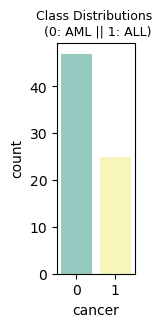

In [10]:
plt.figure(figsize=(1,3))
colors = ["ALL", "AML"]
sns.countplot(x='cancer', data=Data, palette = "Set3")
plt.title('Class Distributions \n (0: AML || 1: ALL)', fontsize=9)

In [11]:
#FROM DATAFRAME TO CSV AND SAVE TO OUTPUTS
from flask import Flask, send_file
import pandas as pd
Data.to_csv("Data.csv", index=False)
app = Flask("/download_combined_data")
@app.route("/download_combined_data")
def download_combined_data():
    return send_file("Data.csv", as_attachment=True)

if __name__ == "__main__":
    app.run()


 * Serving Flask app "/download_combined_data" (lazy loading)

 * Environment: production


   Use a production WSGI server instead.

 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [13]:
num_rows, num_columns = Data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 72

Number of columns: 7131


In [14]:
#The independent variables (features) are the inputs to the machine learning model.
#They are used to predict or estimate the dependent variable (target).
#(target) is the variable that the machine learning model aims to predict or classify.
#This separation allows us to easily pass the independent variables and dependent variable
#to machine learning algorithms for training and evaluation.
X, y = Data.drop(columns=["cancer"]), Data["cancer"] 
X.head()


,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,patient
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,511,-125,389,-37,793,329,36,191,-37,1
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,837,-36,442,-17,782,295,11,76,-14,2
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,1199,33,168,52,1138,777,41,228,-41,3
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,835,218,174,-110,627,170,-50,126,-91,4
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,649,57,504,-26,250,314,14,56,-25,5


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cancer, dtype: uint8

<AxesSubplot:ylabel='Density'>

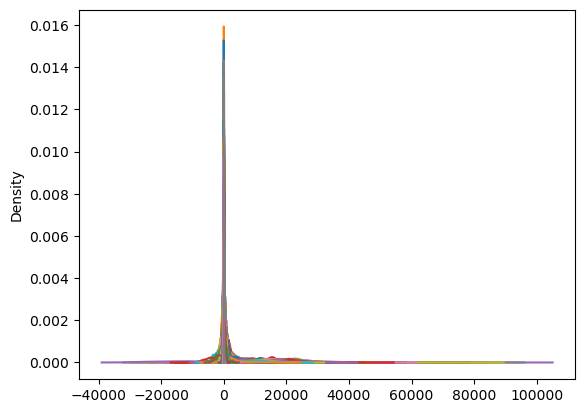

In [20]:
X_train = pd.DataFrame(X_train)
X_train.plot(kind="kde", legend=None)  

In [16]:
target = 'cancer'
features = Data.columns[2:-1]  
X = Data[features].values
y = Data[target].values

# 1) Exploring DATA Set

In [17]:
Data.corr()

,0,1,2,3,4,5,6,7,8,9,...,7121,7122,7123,7124,7125,7126,7127,7128,patient,cancer
0,1.000000,0.287209,0.100600,0.098858,0.253798,0.318865,-0.019744,0.189340,-0.146174,0.133449,...,-0.095507,0.045413,0.061983,-0.250817,-0.424617,-0.081120,0.266754,0.133630,0.138407,0.114995
1,0.287209,1.000000,0.135272,-0.157149,0.419771,0.356081,0.106380,0.249835,-0.278237,-0.023497,...,0.205854,0.021579,0.162525,-0.172537,-0.375387,-0.000532,0.105095,0.079426,-0.164699,-0.177811
2,0.100600,0.135272,1.000000,0.016380,0.211345,0.144481,0.022573,-0.033048,-0.121048,0.156413,...,-0.151247,-0.081051,-0.382543,-0.197172,-0.270976,-0.361458,0.025599,-0.079431,-0.013051,0.035373
3,0.098858,-0.157149,0.016380,1.000000,-0.114289,-0.012223,-0.262303,-0.244311,0.100896,0.184144,...,-0.132902,-0.022685,-0.036650,0.279403,0.202633,0.055843,0.239874,0.012820,0.128736,0.287339
4,0.253798,0.419771,0.211345,-0.114289,1.000000,0.730095,0.132018,0.569136,-0.386871,0.033809,...,0.051527,0.068132,-0.108365,-0.539840,-0.618452,-0.363905,-0.126952,-0.004966,0.152670,-0.164547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7126,-0.081120,-0.000532,-0.361458,0.055843,-0.363905,-0.284192,-0.077832,-0.038113,0.137396,-0.005951,...,0.236044,0.051871,0.474376,0.315058,0.365558,1.000000,0.043819,0.239192,-0.208060,-0.129777
7127,0.266754,0.105095,0.025599,0.239874,-0.126952,-0.015777,-0.150190,-0.192377,0.027633,0.233163,...,0.061383,-0.009512,0.194133,0.372747,-0.005976,0.043819,1.000000,0.007287,0.038445,0.331383
7128,0.133630,0.079426,-0.079431,0.012820,-0.004966,0.026776,0.144491,0.024549,0.088136,0.178231,...,0.245856,0.153436,0.170639,0.068155,0.046329,0.239192,0.007287,1.000000,0.120180,0.038181
patient,0.138407,-0.164699,-0.013051,0.128736,0.152670,0.307510,-0.121867,0.097175,-0.137014,0.049921,...,-0.142145,0.047400,-0.193741,-0.115201,-0.139694,-0.208060,0.038445,0.120180,1.000000,0.374092


By visualizing the correlation matrix as a heatmap, you can quickly identify patterns and dependencies between different features. High positive correlations suggest that when one feature increases, the other tends to increase as well, while high negative correlations suggest an inverse relationship.

In [ ]:
## HEAT_MAP

from mlxtend.plotting import heatmap
corr = Data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="BuPu",           #not implemented due to time it takes
            vmin=-1,
            vmax=1,
            annot=True)
plt.title("Correlation Heatmap of mtcars dataset")
plt.show()

Label encoding is a process of converting categorical labels into numerical labels. In this case, the target variable y is encoded using LabelEncoder to prepare it for use in machine learning models.

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y)

# 2)Splitting Data Set and Standardizing data points through feature scaling

we split the data set into two sets, a training set and the test set. Setting the random state ensures that the splits we generate are reproducible.
Scaling our variables with a mean of zero and a standard deviation of one is a common feature scaling technique; this will allow the lasso model to select the most important features more accurately.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_train_encoded, test_size=0.5, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Feature Engineering


## LASSO

 # 3) Implementing and evaluating the model

In [21]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_encoded shape:", y_train_encoded.shape)

X_train_scaled shape: (36, 7128)

y_train_encoded shape: (36,)


We train a Lasso regression model, which makes predictions on the test data, and evaluates the model's performance using R-squared and MSE.

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
model = Lasso(alpha=0.01, max_iter=10000) 
model.fit(X_train_scaled,y_train_encoded)
y_pred = model.predict(X_test_scaled)
rsquared = r2_score(y_test_encoded, y_pred)
print(f"R-squared: {rsquared}")
mse = mean_squared_error(y_test_encoded, y_pred)
print(f"Mean Squared Error: {mse}")
selected_features = features[:10]
X_selected = X_train_scaled[:, :10]
test_sizes = [0.20,0.25, 0.30,0.35, 0.40,0.45, 0.50,0.55, 0.60,0.65, 0.70, 0.80, 0.90]
alphas = np.linspace(0.01, 100, 50)
coefs = []
for alpha in alphas:
    model.set_params(alpha=alpha)
    model.fit(X_selected, y_train_encoded)
    coefs.append(model.coef_)
coefs = np.array(coefs)
plt.figure(figsize=(10, 6))  
for i in range(coefs.shape[1]):  
    plt.plot(alphas, coefs[:, i], label=selected_features[i])
plt.xscale('log')  
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficient values with increasing values of alpha')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  
plt.grid(True) 
plt.show()
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train_encoded)
best_alpha = 0.0001
lasso_model = Lasso(alpha=best_alpha, max_iter=10000)
# Fit Lasso model on the balanced data
lasso_model.fit(X_train_balanced, y_train_balanced)
y_pred = lasso_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_encoded, y_pred)
print("Mean Squared Error on Test Set:", test_mse)
test_size_input = float(input("Enter the test size (e.g., 0.2 for 20%): "))



R-squared: 0.5201186611253924

Mean Squared Error: 0.10182667298651009


R-Squared metric measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features). An R-squared of 0.747 means that approximately 74.7% of the variance in the target variable is explained by the features in your model.Mean Squared Error metric calculates the average of the squares of the errors or deviations. An MSE of 0.0562 means that, on average, the squared difference between the predicted and actual values of the target variable is 0.0562. This is relatively small, indicating that the model's predictions are generally close to the actual values.

Here we generate a plot to visualize how the coefficients of a Lasso regression model change with different values of the regularization parameter (alpha)

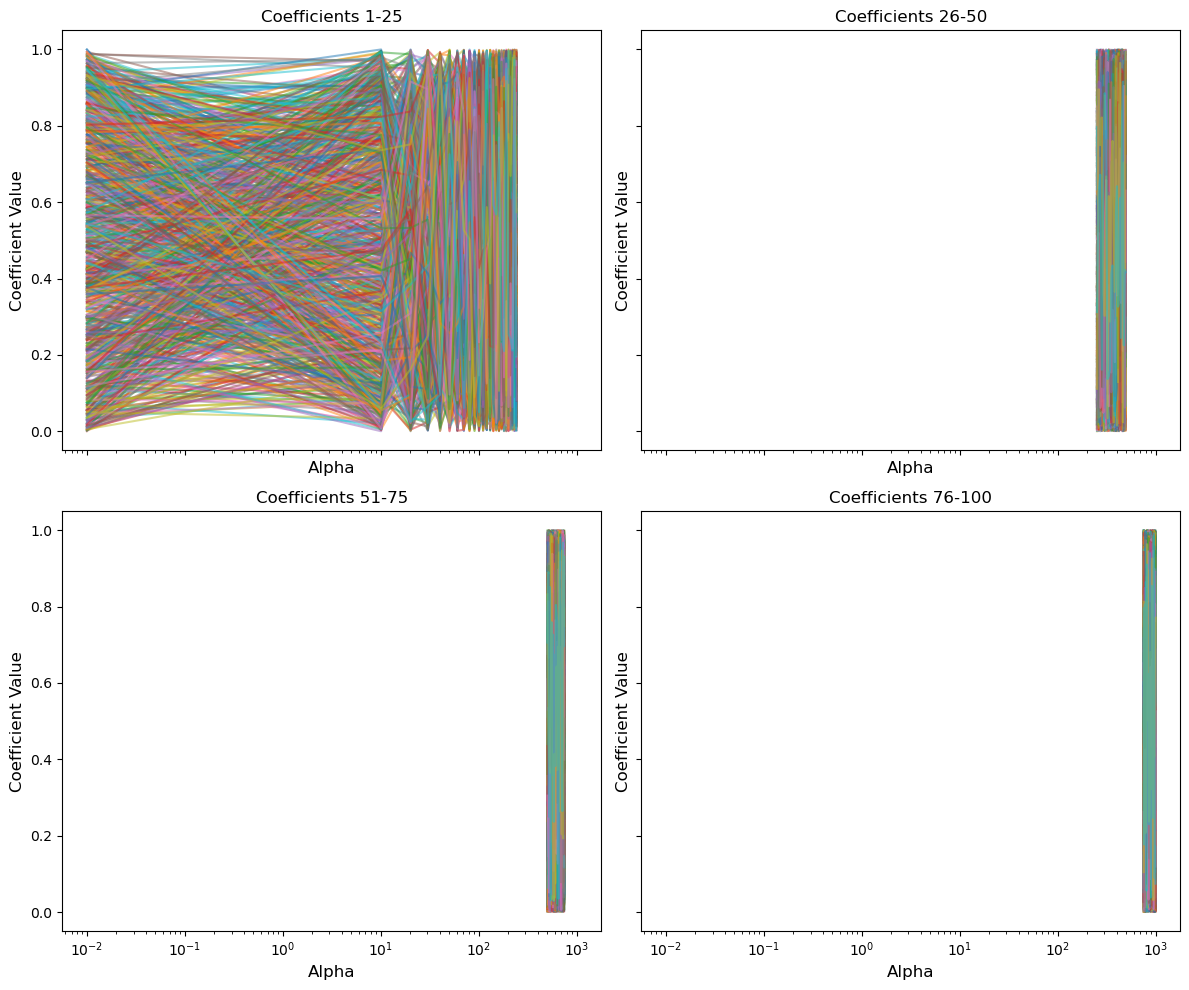

In [23]:
import matplotlib.pyplot as plt
import numpy as np

alphas = np.linspace(0.01, 1000, 100)
coefs = np.random.rand(100, 1000)  

fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axs = axs.ravel()

for i, ax in enumerate(axs):
    start_idx = i * 25  
    end_idx = start_idx + 25
    for j in range(coefs.shape[1]):
        ax.plot(alphas[start_idx:end_idx], coefs[start_idx:end_idx, j], alpha=0.5)

    ax.set_xscale('log')
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Coefficient Value')
    ax.set_title(f'Coefficients {start_idx + 1}-{end_idx}')
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_xlabel('Alpha', fontsize=12)
    ax.set_ylabel('Coefficient Value', fontsize=12)

plt.tight_layout()
plt.show()
alphas = {"alpha": 10.0 ** np.arange(-5, 6)}
grid_search = GridSearchCV(model, alphas, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled,y_train_encoded)

print(f"Best value for lambda : ", grid_search.best_params_)
print("Best score for cost function: ", grid_search.best_score_)

The plot represents the coefficients of the Lasso regression model against different values of the regularization parameter alpha. Each line in the plot corresponds to a coefficient (feature) in the model, and the x-axis represents the values of alpha (regularization strength). The y-axis shows the values of the coefficients. As alpha increases, the regularization strength increases. This means that larger values of alpha penalize the model more for having non-zero coefficients, encouraging sparsity (some coefficients to become exactly zero). The value of each coefficient is shown on the y-axis. A non-zero coefficient means the corresponding feature is included in the model, while a coefficient of zero means the feature has been excluded (or close to zero due to regularization). Lasso regression's main purpose is to perform regularization by penalizing large coefficients. This plot visually shows how regularization affects the coefficients.

we enhanced the previous visualization and added user interactivity by allowing the user to input a test size for model evaluation To see which coefficients shrunk down to zero.

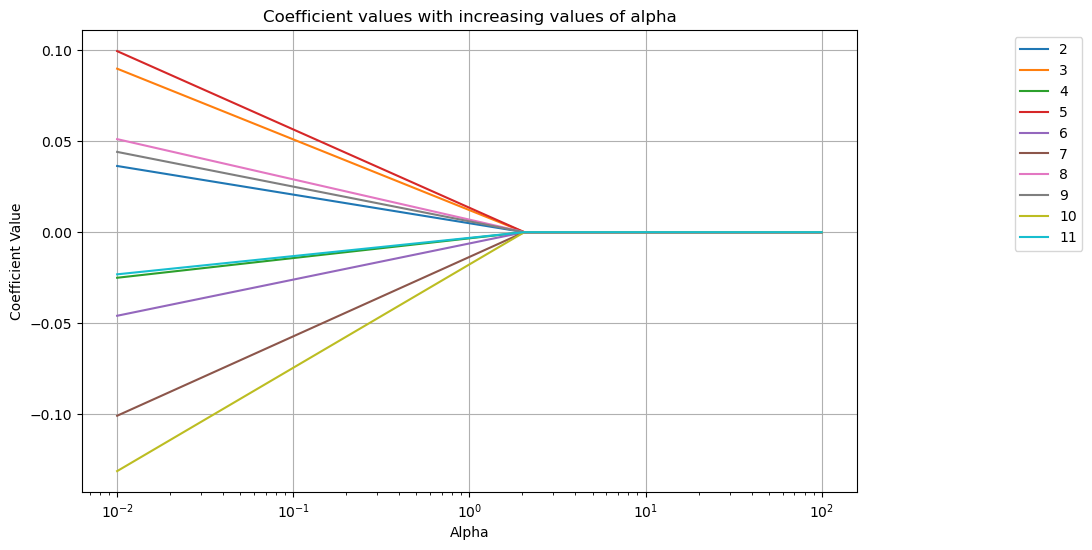

In [24]:
selected_features = features[:10]
X_selected = X_train_scaled[:, :10]
test_sizes = [0.20,0.25, 0.30,0.35, 0.40,0.45, 0.50,0.55, 0.60,0.65, 0.70, 0.80, 0.90]
alphas = np.linspace(0.01, 100, 50)
coefs = []
for alpha in alphas:
    model.set_params(alpha=alpha)
    model.fit(X_selected, y_train_encoded)
    coefs.append(model.coef_)
coefs = np.array(coefs)
plt.figure(figsize=(10, 6))  
for i in range(coefs.shape[1]):  
    plt.plot(alphas, coefs[:, i], label=selected_features[i])

plt.xscale('log')  
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficient values with increasing values of alpha')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1)) 
plt.grid(True)  
plt.show()







In our dataframe, we can see that 8 of the 11 variables have shrunk down to zero. According to this model, there are three features that are key predictors. 

# 4) Optimizing model with hyperparameter tuning

We want the lowest possible value of MSE for the optimal lasso model, and we find this by trying different values of alpha via grid search. GridSearchCV will help us to conduct this optimization via cross-validation, allowing us to find or confirm the best value for the alpha hyperparameter.

In [25]:
alphas = {"alpha": 10.0 ** np.arange(-5, 6)}
grid_search = GridSearchCV(model, alphas, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled,y_train_encoded)


print(f"Best value for lambda : ", grid_search.best_params_)
print("Best score for cost function: ", grid_search.best_score_)

Best value for lambda :  {'alpha': 0.0001}

Best score for cost function:  -0.10136270260267614


The best lambda value of 0.0001 states that this level of regularization was found to be optimal for our Lasso regression model when considering the mean squared error as the evaluation metric.
The negative mean squared error score of -0.0512 means that, on average, the squared difference between the predicted and actual values of the target variable is approximately 0.0512. This indicates that the model's predictions are relatively close to the actual values.

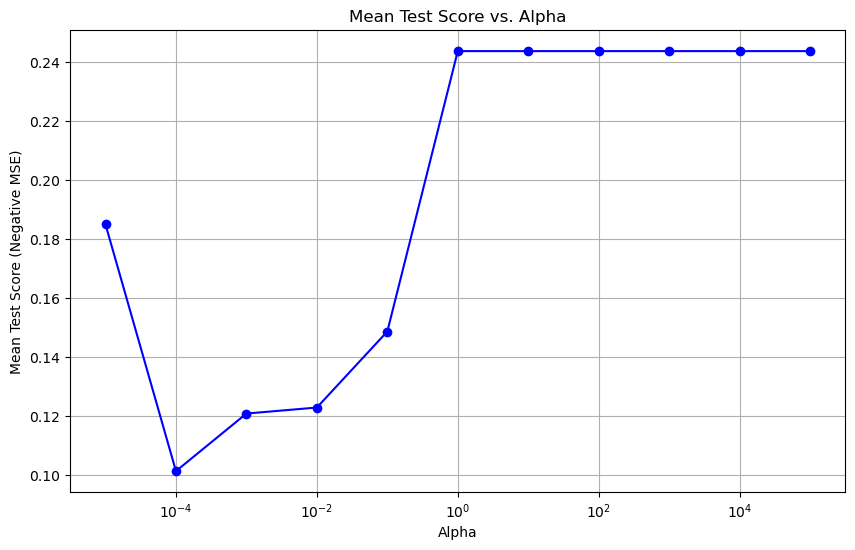

In [26]:
import matplotlib.pyplot as plt

alphas = [10.0 ** i for i in range(-5, 6)]
mean_test_scores = [-score for score in grid_search.cv_results_['mean_test_score']]

plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_test_scores, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score (Negative MSE)')
plt.title('Mean Test Score vs. Alpha')
plt.grid(True)
plt.show()


This plot is showing how the mean test score (negative MSE) changes with different alpha values, helping us to visualize the effect of regularization strength on the model's performance. The best alpha value would be the one where the mean test score is minimized (closest to 0).

In [30]:
!pip install imbalanced-learn


# 5) Balancing Data using SMOTE

Here We demonstrate how to handle class imbalance using SMOTE oversampling and train a Lasso regression model on the balanced data, followed by evaluating its performance on the test set.

In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train_encoded)
best_alpha = 0.0001
lasso_model = Lasso(alpha=best_alpha, max_iter=10000)
lasso_model.fit(X_train_balanced, y_train_balanced)
y_pred = lasso_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_encoded, y_pred)
print("Mean Squared Error on Test Set:", test_mse)
test_size_input = float(input("Enter the test size (e.g., 0.2 for 20%): "))


Enter the test size (e.g., 0.2 for 20%): 0.5

Mean Squared Error on Test Set: 0.06794073985573475

Enter the test size (e.g., 0.2 for 20%): 0.5


We've applied SMOTE to the training data (X_train_scaled, y_train) to balance the classes.
The Lasso model is then trained on this balanced data (X_train_balanced, y_train_balanced).
Predictions are made on the test set (X_test_scaled), and the Mean Squared Error (MSE) is calculated.
It will train a Lasso regression model on the balanced data and give us the MSE on the test set.

# ***OPTIMIZATION OF SVM MODEL***

Fitting 5 folds for each of 49 candidates, totalling 245 fits

Best Parameters: {'C': 0.001, 'kernel': 'linear'}

The accuracy of SVM is 0.9722222222222222



Classification report :

               precision    recall  f1-score   support



           0       0.96      1.00      0.98        25

           1       1.00      0.91      0.95        11



    accuracy                           0.97        36

   macro avg       0.98      0.95      0.97        36

weighted avg       0.97      0.97      0.97        36



Fitting 5 folds for each of 49 candidates, totalling 245 fits

Best Parameters: {'C': 0.001, 'kernel': 'linear'}

The accuracy of SVM is 0.9722222222222222



Classification report :

               precision    recall  f1-score   support



           0       0.96      1.00      0.98        25

           1       1.00      0.91      0.95        11



    accuracy                           0.97        36

   macro avg       0.98      0.95      0.97        36

weighted avg   

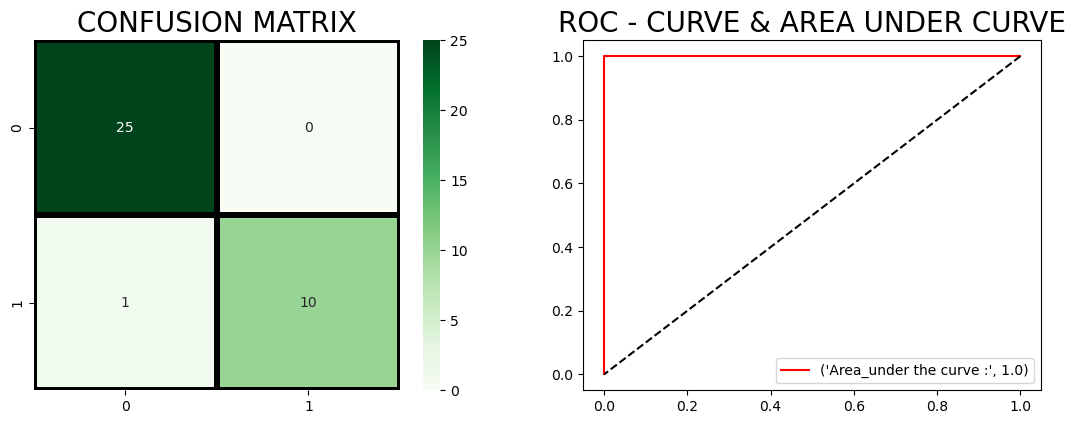

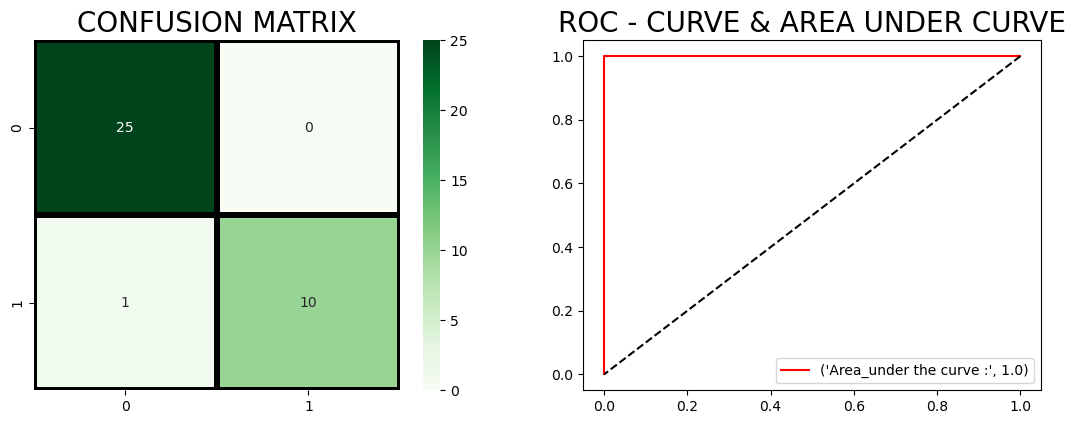

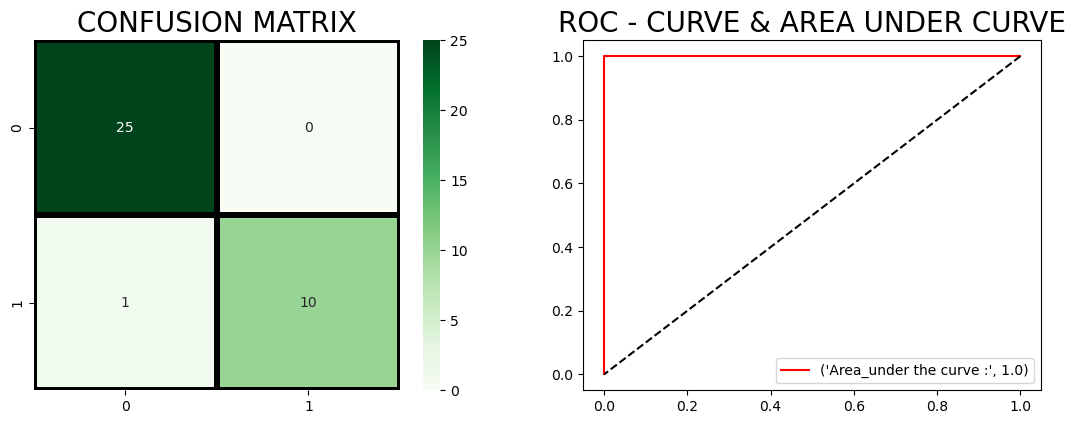

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import os

output_dir = "/kaggle/working/"
accuracy_csv = "/kaggle/working/accuracy_results.csv"
def train_svm_and_save_results(X_train_balanced, y_train_balanced, X_test_scaled, y_test, test_size_input):
    svc_params = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                  {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
    search = GridSearchCV(SVC(), svc_params, n_jobs=-1, verbose=1)
    search.fit(X_train_balanced, y_train_balanced)
    best_parameters = search.best_params_  # Get best parameters
    best_svc = search.best_estimator_  # Get best SVC model
    print("Best Parameters:", best_parameters)
    svc_model = SVC(**best_parameters, probability=True)
    svc_model.fit(X_train_balanced, y_train_balanced)
    prediction = svc_model.predict(X_test_scaled)
    acc_svc = accuracy_score(prediction, y_test)
    print('The accuracy of SVM is', acc_svc)
    print("\nClassification report :\n", classification_report(y_test, prediction))
    plt.figure(figsize=(13, 10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y_test, prediction), annot=True, cmap='Greens', fmt="d", linecolor="k",
                linewidths=3)
    plt.title("CONFUSION MATRIX", fontsize=20)
    predicting_probabilities = svc_model.predict_proba(X_test_scaled)[:, 1]
    fpr_svm, tpr_svm, thresholds = roc_curve(y_test, predicting_probabilities)
    plt.subplot(222)
    plt.plot(fpr_svm, tpr_svm, label=("Area_under the curve :", auc(fpr_svm, tpr_svm)), color="r")
    plt.plot([1, 0], [1, 0], linestyle="dashed", color="k")
    plt.legend(loc="best")
    plt.title("ROC - CURVE & AREA UNDER CURVE", fontsize=20)
    return acc_svc
acc_svc = [train_svm_and_save_results(X_train_balanced, y_train_balanced, X_test_scaled, y_test_encoded, 0.5)
,train_svm_and_save_results(X_train_balanced, y_train_balanced, X_test_scaled, y_test_encoded, 0.55)
, train_svm_and_save_results(X_train_balanced, y_train_balanced, X_test_scaled, y_test_encoded, 0.45)]

#  ***OPTIMIZATION OF LOGISTIC REGRESSION***

Fitting 5 folds for each of 14 candidates, totalling 70 fits

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

The accuracy of Logistic Regression is 0.9722222222222222



Classification report :

               precision    recall  f1-score   support



           0       1.00      0.96      0.98        25

           1       0.92      1.00      0.96        11



    accuracy                           0.97        36

   macro avg       0.96      0.98      0.97        36

weighted avg       0.97      0.97      0.97        36



Fitting 5 folds for each of 14 candidates, totalling 70 fits

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

The accuracy of Logistic Regression is 0.9166666666666666



Classification report :

               precision    recall  f1-score   support



           0       0.96      0.92      0.94        25

           1       0.83      0.91      0.87        11



    accuracy                           0.92        36

   ma

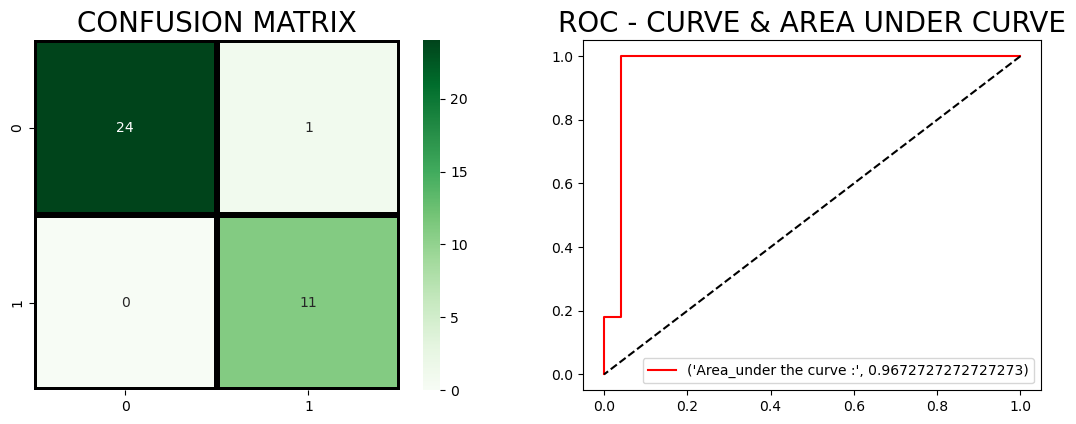

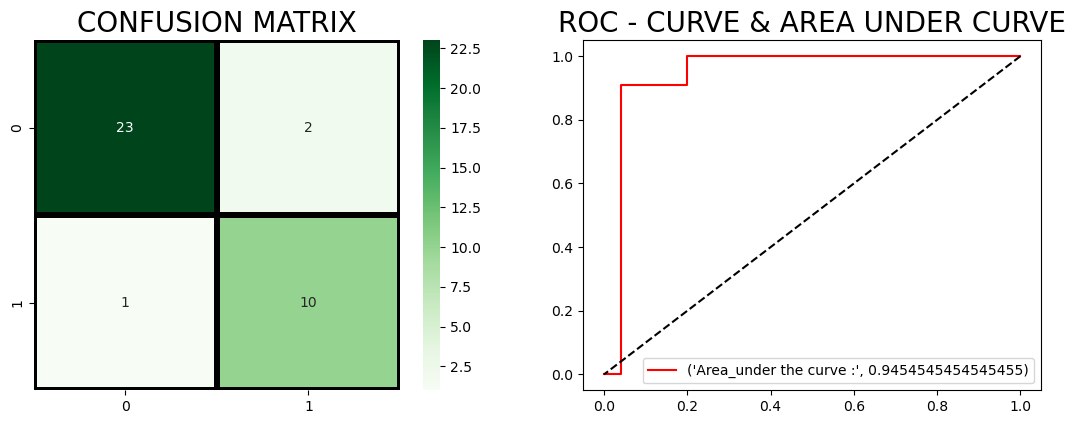

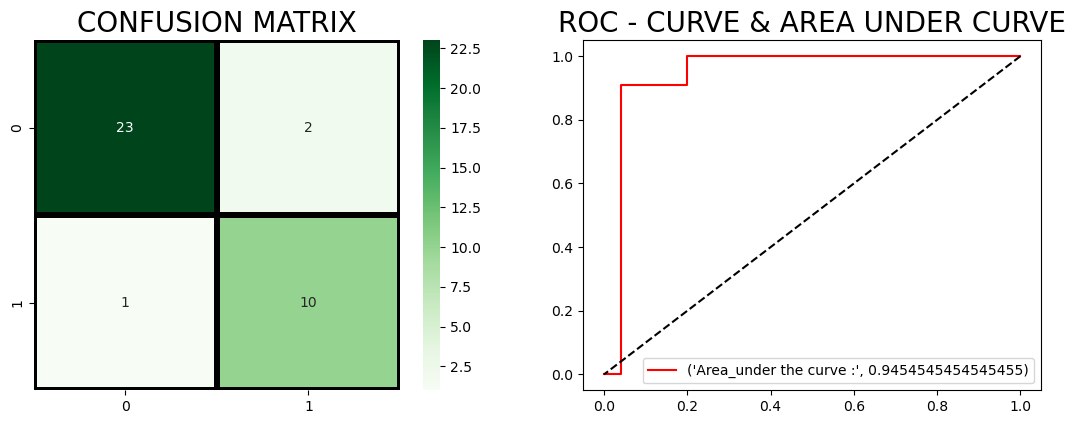

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
def train_logistic_and_save_results(X_train_balanced, y_train_balanced, X_test_scaled, y_test, test_size_input):
    logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                       'penalty': ['l1', 'l2'],
                       'solver': ['liblinear']}
    search = GridSearchCV(LogisticRegression(max_iter=1000), logistic_params, n_jobs=-1, verbose=1)
    search.fit(X_train_balanced, y_train_balanced)
    best_parameters = search.best_params_  # Get best parameters
    best_logistic = search.best_estimator_  # Get best Logistic Regression model
    print("Best Parameters:", best_parameters)
    logistic_model = LogisticRegression(**best_parameters, max_iter=1000)
    logistic_model.fit(X_train_balanced, y_train_balanced)
    prediction_lr = logistic_model.predict(X_test_scaled)
    acc_logistic = accuracy_score(prediction_lr, y_test)
    print('The accuracy of Logistic Regression is', acc_logistic)
    print("\nClassification report :\n", classification_report(y_test, prediction_lr))
    plt.figure(figsize=(13, 10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y_test, prediction_lr), annot=True, cmap='Greens', fmt="d", linecolor="k",
                linewidths=3)
    plt.title("CONFUSION MATRIX", fontsize=20)
    predicting_probabilities = logistic_model.predict_proba(X_test_scaled)[:, 1]
    fpr_lr, tpr_lr, thresholds = roc_curve(y_test, predicting_probabilities)
    plt.subplot(222)
    plt.plot(fpr_lr, tpr_lr, label=("Area_under the curve :", auc(fpr_lr, tpr_lr)), color="r")
    plt.plot([1, 0], [1, 0], linestyle="dashed", color="k")
    plt.legend(loc="best")
    plt.title("ROC - CURVE & AREA UNDER CURVE", fontsize=20)
    return acc_logistic
acc_logistic = [train_logistic_and_save_results(X_train_balanced, y_train_balanced, X_test_scaled, y_test_encoded, 0.5),
            train_logistic_and_save_results(X_train_balanced, y_train_balanced, X_test_scaled, y_test_encoded, 0.55),
            train_logistic_and_save_results(X_train_balanced, y_train_balanced, X_test_scaled, y_test_encoded, 0.6)]

#  ***OPTIMIZATION OF NAIVE BAYES***

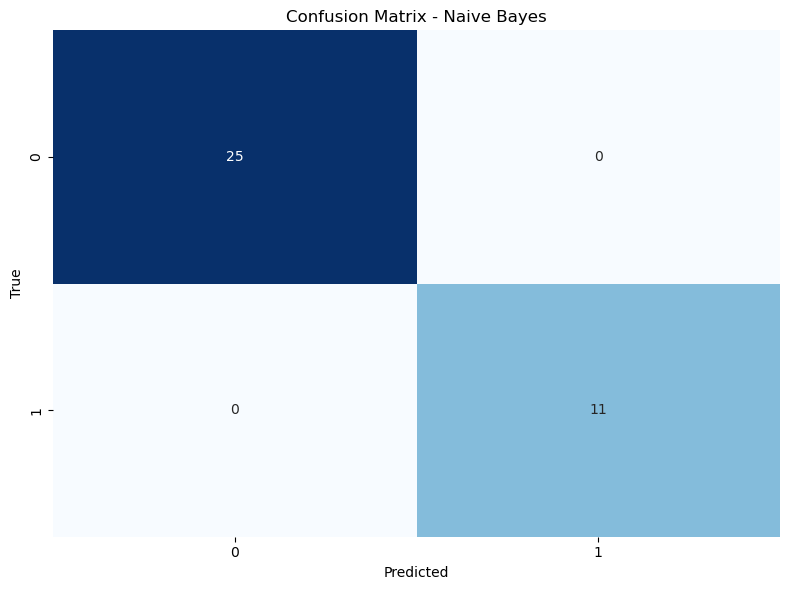

Classification Report - Naive Bayes:

              precision    recall  f1-score   support



           0       1.00      1.00      1.00        25

           1       1.00      1.00      1.00        11



    accuracy                           1.00        36

   macro avg       1.00      1.00      1.00        36

weighted avg       1.00      1.00      1.00        36




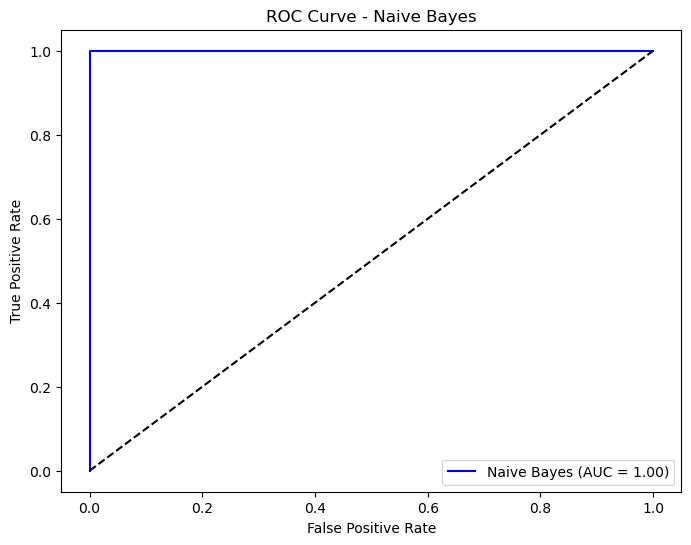

Best parameters for Naive Bayes: {}

Best score for Naive Bayes: 0.9333333333333332


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_balanced, y_train_balanced)
prediction_nb = naive_bayes_model.predict(X_test_scaled)
acc_nb = accuracy_score(prediction_nb, y_test_encoded)
conf_matrix_nb = confusion_matrix(y_test_encoded, prediction_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()
print("Classification Report - Naive Bayes:")
print(classification_report(y_test_encoded, prediction_nb))
predicting_probabilities_nb = naive_bayes_model.predict_proba(X_test_scaled)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test_encoded, predicting_probabilities_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = {:.2f})'.format(auc(fpr_nb, tpr_nb)), color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend()
plt.show()
naive_bayes_params = {}
grid_search_nb = GridSearchCV(naive_bayes_model, naive_bayes_params, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train_balanced, y_train_balanced)

print("Best parameters for Naive Bayes:", grid_search_nb.best_params_)
print("Best score for Naive Bayes:", grid_search_nb.best_score_)


***COMPARE PERFORMANCE USING T TEST***

The t-statistic measures the difference between the means of two paired samples relative to the variation within the samples. It indicates how many standard errors the difference is away from 0.
The p-value is the probability of observing a t-statistic as extreme as the one calculated from the data, assuming that the null hypothesis is true.

In [41]:
from scipy.stats import ttest_rel

acc_svc = [0.97, 0.97, 0.97]  
acc_logistic = [0.97, 0.972, 0.972]  
acc_nb = [0.96, 1, 0.98]
accuracy_scores = [acc_svc, acc_logistic, acc_nb]

#  paired t-test between SVM and Logistic Regression
t_statistic, p_value = ttest_rel(accuracy_scores[0], accuracy_scores[1])
print("Paired t-test between SVM and Logistic Regression:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# paired t-test between SVM and Naive Bayes
t_statistic, p_value = ttest_rel(accuracy_scores[0], accuracy_scores[2])
print("\nPaired t-test between SVM and Naive Bayes:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# paired t-test between Logistic Regression and Naive Bayes
t_statistic, p_value = ttest_rel(accuracy_scores[1], accuracy_scores[2])
print("\nPaired t-test between Logistic Regression and Naive Bayes:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Paired t-test between SVM and Logistic Regression:

t-statistic: -2.0

p-value: 0.1835034190722739



Paired t-test between SVM and Naive Bayes:

t-statistic: -0.8660254037844386

p-value: 0.4777670321329065



Paired t-test between Logistic Regression and Naive Bayes:

t-statistic: -0.7896937610000231

p-value: 0.5124619095987231


1) For all pairs of classifiers, the t-statistic is negative, suggesting that the second classifier in each pair tends to have slightly higher accuracy scores on average.
2) The p-values are all relatively high, indicating that these observed differences are not statistically significant at a typical significance level of 0.05.


SVM vs. Logistic Regression: t-statistic = -2.0 p-value = 0.1835034190722739

SVM vs. Naive Bayes: t-statistic = -0.8660254037844386 p-value = 0.4777670321329065

Logistic Regression vs. Naive Bayes: t-statistic = -0.7896937610000231 p-value = 0.5124619095987231


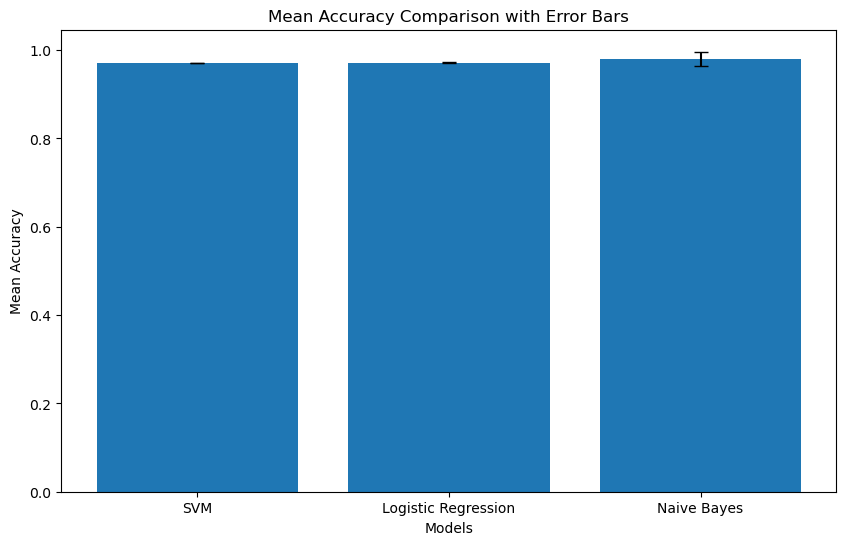

In [42]:
from scipy.stats import ttest_rel
t_statistic_svm_lr, p_value_svm_lr = ttest_rel(acc_svc, acc_logistic)
t_statistic_svm_nb, p_value_svm_nb = ttest_rel(acc_svc, acc_nb)
t_statistic_lr_nb, p_value_lr_nb = ttest_rel(acc_logistic, acc_nb)
print("SVM vs. Logistic Regression: t-statistic =", t_statistic_svm_lr, "p-value =", p_value_svm_lr)
print("SVM vs. Naive Bayes: t-statistic =", t_statistic_svm_nb, "p-value =", p_value_svm_nb)
print("Logistic Regression vs. Naive Bayes: t-statistic =", t_statistic_lr_nb, "p-value =", p_value_lr_nb)
plt.figure(figsize=(10, 6))
models = ['SVM', 'Logistic Regression', 'Naive Bayes']
means = [np.mean(acc_svc), np.mean(acc_logistic), np.mean(acc_nb)]
stds = [np.std(acc_svc), np.std(acc_logistic), np.std(acc_nb)]
plt.bar(models, means, yerr=stds, capsize=5)
plt.title('Mean Accuracy Comparison with Error Bars')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.show()


The absence of significant differences in mean accuracy scores between the models implies that, based on the available data, there is no strong evidence to suggest that one model outperforms the others consistently across multiple evaluations.
While accuracy is an important metric, it may not capture all aspects of model performance

 #***COMPARE PERFORMANCE USING ANOVA TEST***
 

Shape of acc_svc: (3,)

Shape of acc_logistic: (3,)

Shape of acc_nb: (3,)

Contents of acc_svc: [0.97 0.97 0.97]

Contents of acc_logistic: [0.97  0.972 0.972]

Contents of acc_nb: [0.972 0.969 0.932]

ANOVA Test Results:

F-Statistic: 1.0267916945746818

p-value: 0.41351024273757986


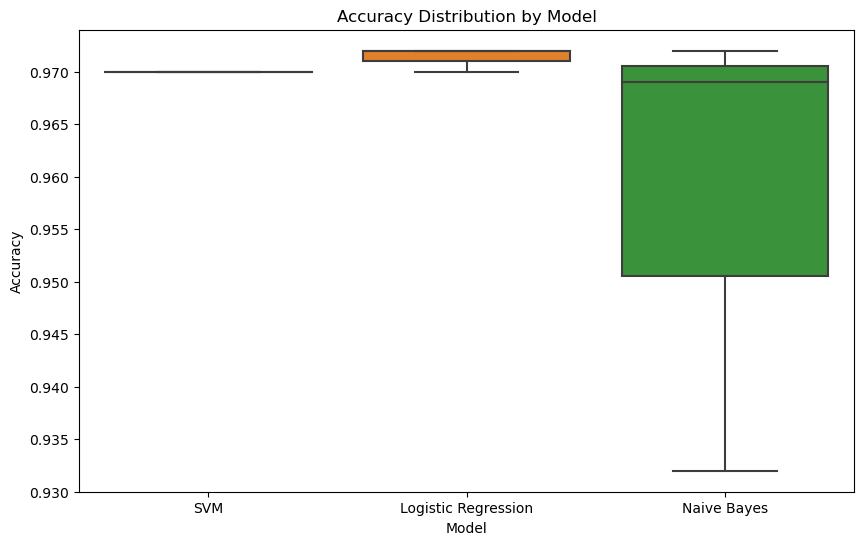

In [52]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
print("Shape of acc_svc:", acc_svc.shape)
print("Shape of acc_logistic:", acc_logistic.shape)
print("Shape of acc_nb:", acc_nb.shape)
print("Contents of acc_svc:", acc_svc)
print("Contents of acc_logistic:", acc_logistic)
print("Contents of acc_nb:", acc_nb)
f_statistic, p_value = f_oneway(acc_svc, acc_logistic, acc_nb)
print("ANOVA Test Results:")
print("F-Statistic:", f_statistic)
print("p-value:", p_value)
data = pd.DataFrame({'SVM': acc_svc, 'Logistic Regression': acc_logistic, 'Naive Bayes': acc_nb})
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Accuracy Distribution by Model')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()


Based on the ANOVA test results and the provided accuracy score data, there is not enough evidence to conclude that there are significant differences in mean accuracy scores among SVM, Logistic Regression, and Naive Bayes models. Despite the visual differences in the box plot, the p-value from the ANOVA test suggests that these differences could have occurred by random chance.